In [50]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [51]:
centroids = [(-5,-5),(5,5),(-2.5,2.5)]
cluster_std = [1,1,1]

<function matplotlib.pyplot.show(close=None, block=None)>

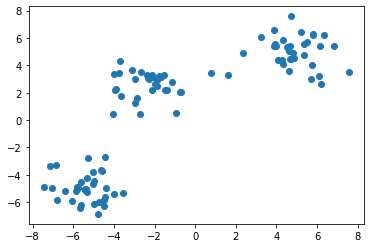

In [52]:
X,y = make_blobs(n_samples=100, cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)
plt.scatter(X[:,0],X[:,1])
plt.show

### decide clusters
### select random centroids
### assign clusters
### move centroids
### check finish

In [53]:
import random
import numpy as np
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
    
    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        
        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check_finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
    
    def assign_clusters(self,X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos )
            distances.clear()        
        return np.array(cluster_group)   
    
    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

In [54]:
km = KMeans(n_clusters=3,max_iter=100)
y_means = km.fit_predict(X)

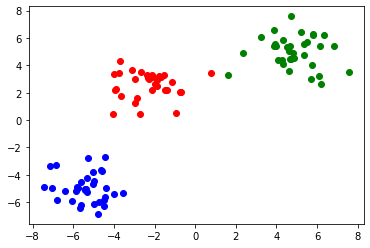

In [55]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')

plt.show()

In [56]:
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'